In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [16]:
n_samples = 10_000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2, 0]] / 10
data = data * np.array([1, -1])

(-2.0, 2.0)

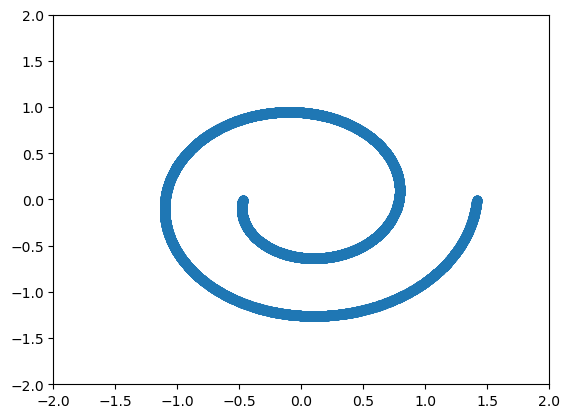

In [17]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])

In [22]:
class DiffusionModel():
    
    def __init__(self, T):
        
        self.betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
        self.alphas = 1 - self.betas
        self.alphas_bar = torch.cumprod(self.alphas, 0)
        
    def forward_process(self, x0, t): 
        """
        :param t: Number of diffusion steps
        """
        
        assert t > 0, 't should be greater than 0'
        
        t = t -1 # Because we start indexing at 0
        
        mu = torch.sqrt(self.alphas_bar[t]) * x0
        std = torch.sqrt(1 - self.alphas_bar[t])
        epsilon = torch.randn_like(x0)
        
        return mu + epsilon * std # data ~ N(mu, std)

In [27]:
model = DiffusionModel(40)
x0 = torch.from_numpy(data)
xT = model.forward_process(x0, 20)

In [28]:
print(xT.mean(0))
print(xT.std(0))

tensor([ 0.0188, -0.2005], dtype=torch.float64)
tensor([0.6992, 0.6648], dtype=torch.float64)


(-2.0, 2.0)

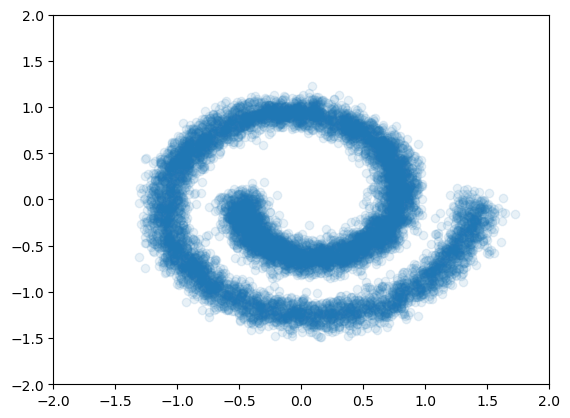

In [29]:
plt.scatter(xT[:, 0].data.numpy(), xT[:, 1].data.numpy(), alpha=0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])